<a href="https://colab.research.google.com/github/Wikanda-Hongboonmee/multivariate/blob/main/Chapter_4_MDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multidimensional Scaling** 

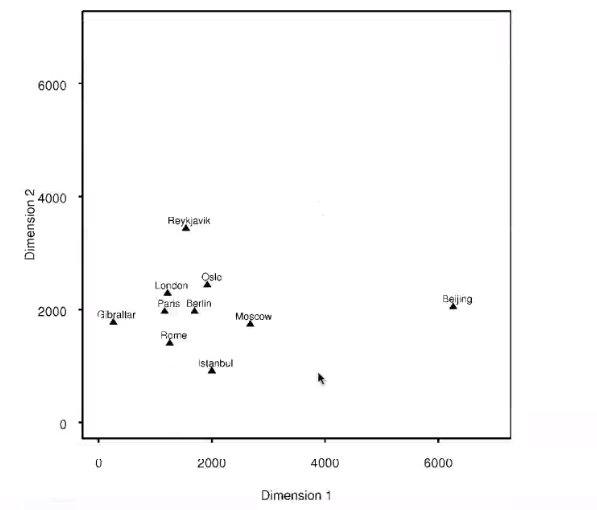

**การทำ MDS เป็นการทำเพื่อให้ข้อมูลมีขนาดของ Dimention ลดลงและสามารถพิจารณาข้อมูลจากราฟได้ง่ายขึ้น**

### **Example on Iris dataset**

In [3]:
import pandas as pd

In [4]:
example_df= pd.read_csv( 'https://raw.github.com/pandas-dev/pandas/master/pandas/tests/io/data/csv/iris.csv')
example_df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### **ลอง plot PCA เพื่อเปรียบเทียบกับ วิธี MDS**

In [5]:
from sklearn.decomposition import PCA

In [6]:
pca = PCA(n_components=2)

In [7]:
new_pca = pca.fit_transform(example_df.iloc[:,:-1]) # เอาทุกแถวยกเว้นคอลัมน์สุดท้าย

In [8]:
new_pca

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456],
       [-2.27989736,  0.74778271],
       [-2.82089068, -0.08210451],
       [-2.62648199,  0.17040535],
       [-2.88795857, -0.57079803],
       [-2.67384469, -0.1066917 ],
       [-2.50652679,  0.65193501],
       [-2.61314272,  0.02152063],
       [-2.78743398, -0.22774019],
       [-3.22520045, -0.50327991],
       [-2.64354322,  1.1861949 ],
       [-2.38386932,  1.34475434],
       [-2.6225262 ,  0.81808967],
       [-2.64832273,  0.31913667],
       [-2.19907796,  0.87924409],
       [-2.58734619,  0.52047364],
       [-2.3105317 ,  0.39786782],
       [-2.54323491,  0.44003175],
       [-3.21585769,  0.14161557],
       [-2.30312854,  0.10552268],
       [-2.35617109, -0.03120959],
       [-2.50791723, -0.13905634],
       [-2.469056  ,  0.13788731],
       [-2.56239095,  0.37468456],
       [-2.63982127,

In [9]:
from matplotlib import pyplot as plt

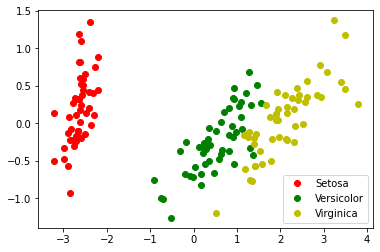

In [10]:
plt.plot(new_pca[:50,0],new_pca[:50,1],'or',label='Setosa')
plt.plot(new_pca[50:100,0],new_pca[50:100,1],'og',label='Versicolor')
plt.plot(new_pca[100:,0],new_pca[100:,1],'oy',label='Virginica')
plt.legend() 
#plt.title('Iris'); # ตั้งชื่อกราฟ .title

### **MDS (Multidimensional Scaling)**

Distance (ระยะห่างระหว่างจุด)

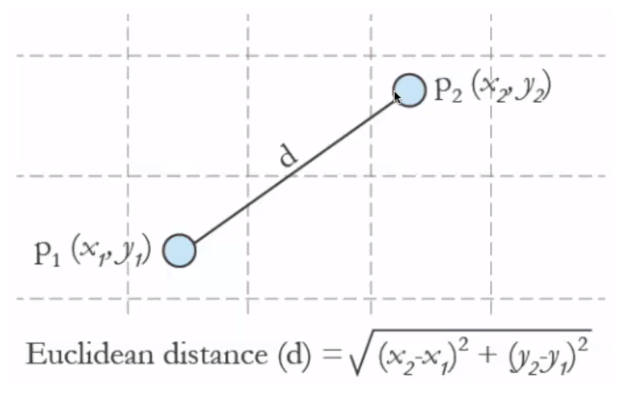

In [13]:
X1 = example_df.iloc[0,:-1].to_numpy() # จุดที่ 1 โดยเอาเฉพาะคอลัมน์ที่เป็นตัวเลขไม่เอาคอลัมน์ที่เป็นชื่อ
X1

array([5.1, 3.5, 1.4, 0.2], dtype=object)

In [17]:
X2 = example_df.iloc[1,:-1].to_numpy() # จุดที่ 2 โดยเอาเฉพาะคอลัมน์ที่เป็นตัวเลขไม่เอาคอลัมน์ที่เป็นชื่อ
X2

array([4.9, 3.0, 1.4, 0.2], dtype=object)

In [18]:
import numpy as np

In [19]:
dist = np.linalg.norm(X1-X2) # คำนวณระยะห่างระห่างจุดแบบใช้สูตร
dist # ระยะห่างระหว่าง x1 and x2 เท่ากับ 0.5385164807134502

0.5385164807134502

In [20]:
(0.04+0.25)**(0.5) # คำนวณระยะห่างระห่างจุดแบบปกติ

0.5385164807134504

## **Distance Matrix**

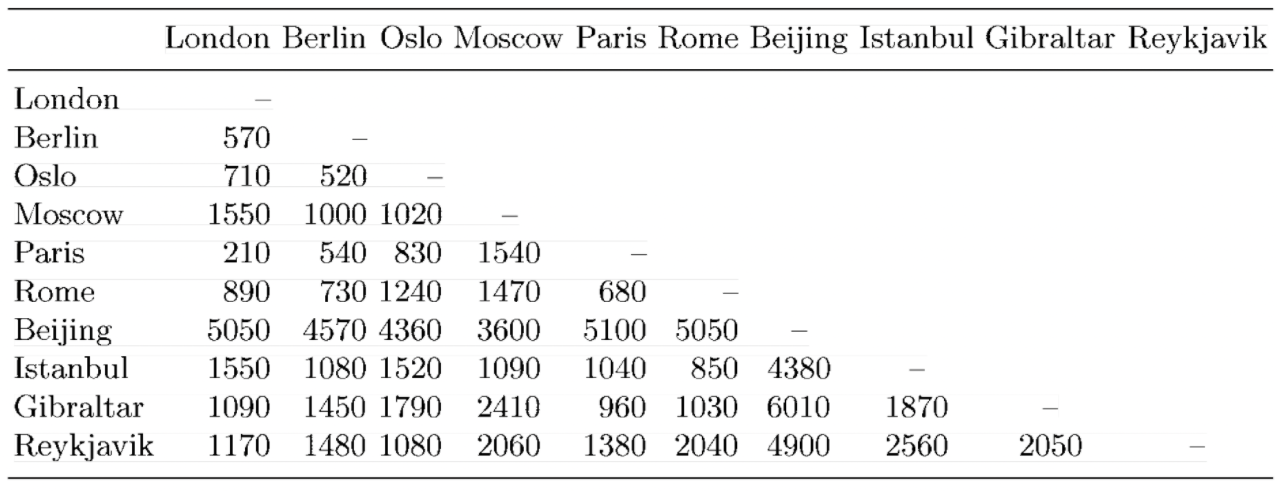

In [21]:
from sklearn.metrics import pairwise_distances
dis_matrix = pairwise_distances(example_df.iloc[:,:-1])
dis_matrix

array([[0.        , 0.53851648, 0.50990195, ..., 4.45982062, 4.65080638,
        4.14004831],
       [0.53851648, 0.        , 0.3       , ..., 4.49888875, 4.71805044,
        4.15331193],
       [0.50990195, 0.3       , 0.        , ..., 4.66154481, 4.84871117,
        4.29883705],
       ...,
       [4.45982062, 4.49888875, 4.66154481, ..., 0.        , 0.6164414 ,
        0.64031242],
       [4.65080638, 4.71805044, 4.84871117, ..., 0.6164414 , 0.        ,
        0.76811457],
       [4.14004831, 4.15331193, 4.29883705, ..., 0.64031242, 0.76811457,
        0.        ]])

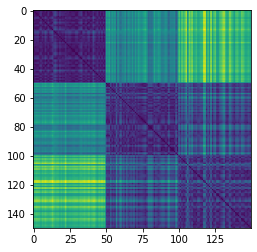

In [22]:
plt.imshow(dis_matrix)

## **MDS**

การทำ MDS เป็นการทำเพื่อให้ข้อมูลมีขนาดของ Dimention ลดลงและสามารถพิจารณาข้อมูลจากราฟได้ง่ายขึ้น

In [23]:
from sklearn.manifold import MDS

In [24]:
mds = MDS(n_components=2)

In [25]:
new_mds = mds.fit_transform(example_df.iloc[:,:-1])

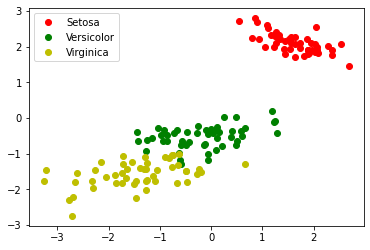

In [26]:
plt.plot(new_mds[:50,0],new_mds[:50,1],'or',label='Setosa')
plt.plot(new_mds[50:100,0],new_mds[50:100,1],'og',label='Versicolor')
plt.plot(new_mds[100:,0],new_mds[100:,1],'oy',label='Virginica')
plt.legend()

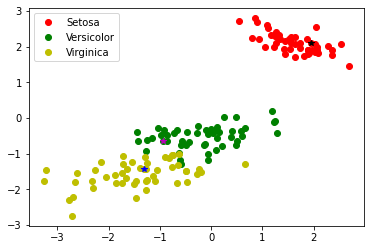

In [27]:
plt.plot(new_mds[:50,0],new_mds[:50,1],'or',label='Setosa')
plt.plot(new_mds[50:100,0],new_mds[50:100,1],'og',label='Versicolor')
plt.plot(new_mds[100:,0],new_mds[100:,1],'oy',label='Virginica')
plt.plot(new_mds[6,0],new_mds[6,1],'*k')
plt.plot(new_mds[56,0],new_mds[56,1],'*m')
plt.plot(new_mds[116,0],new_mds[116,1],'*b')
plt.legend()

### **การใช้ Pre-computed Distance Matrix**



In [28]:
dis_matrix = pairwise_distances(example_df.iloc[:,:-1],metric = 'cityblock') ##‘cityblock’

In [29]:
mds2 = MDS(n_components=2,dissimilarity='precomputed')

In [30]:
new_mds2 = mds2.fit_transform(dis_matrix)

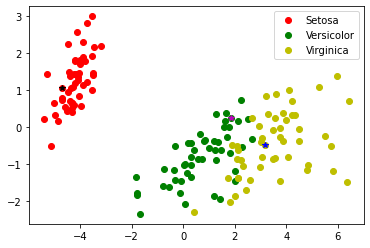

In [31]:
plt.plot(new_mds2[:50,0],new_mds2[:50,1],'or',label='Setosa')
plt.plot(new_mds2[50:100,0],new_mds2[50:100,1],'og',label='Versicolor')
plt.plot(new_mds2[100:,0],new_mds2[100:,1],'oy',label='Virginica')
plt.plot(new_mds2[6,0],new_mds2[6,1],'*k')
plt.plot(new_mds2[56,0],new_mds2[56,1],'*m')
plt.plot(new_mds2[116,0],new_mds2[116,1],'*b')
plt.legend()

### Example 2

https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html

In [47]:
import matplotlib.pyplot as plt # import สำหรับเอาไว้ plot
import seaborn as sns; sns.set() 
import numpy as np

In [48]:
def make_hello(N=1000, rseed=42):
      # Make a plot with "HELLO" text; save as PNG
      fig, ax = plt.subplots(figsize=(4, 1))
      fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
      ax.axis('off')
      ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
      fig.savefig('hello.png')
      plt.close(fig)
      
      # Open this PNG and draw random points from it
      from matplotlib.image import imread
      data = imread('hello.png')[::-1, :, 0].T
      rng = np.random.RandomState(rseed)
      X = rng.rand(4 * N, 2)
      i, j = (X * data.shape).astype(int).T
      mask = (data[i, j] < 1)
      X = X[mask]
      X[:, 0] *= (data.shape[0] / data.shape[1])
      X = X[:N]
      return X[np.argsort(X[:, 0])]

In [49]:
X = make_hello(1000) #จำนวนจุดของข้อมูลทั้งหมด 1000 จุด

In [50]:
X.shape # ตรวจสอบขนาดของ X

(1000, 2)

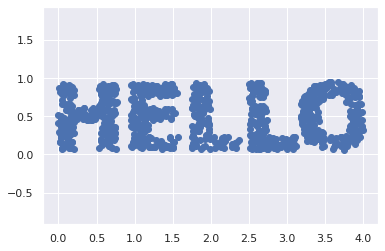

In [51]:
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal'); #เป็นการกำหนดให้แต่ละเเกนมีสเกลเท่ากัน

In [52]:
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5)) # c คือ ค่าในเเนวเเกน X

In [53]:
colorize['c'].shape 

(1000,)

In [54]:
colorize['cmap'] 

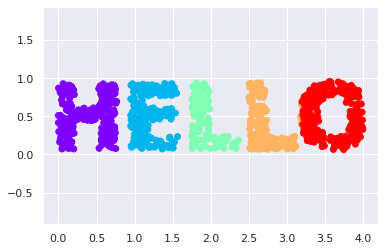

In [55]:
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal');

In [56]:
def rotate(X, angle): #เรียกใช้คำสั่งหมุน
    theta = np.deg2rad(angle)
    R = [[np.cos(theta), np.sin(theta)],
         [-np.sin(theta), np.cos(theta)]]
    return np.dot(X, R)

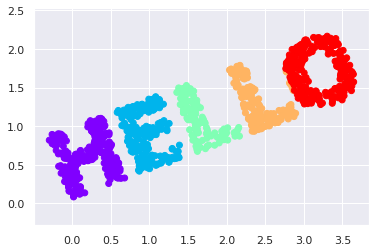

In [57]:
X2 = rotate(X, 20) #หมุน 20 องศา
plt.scatter(X2[:, 0], X2[:, 1], **colorize)
plt.axis('equal');

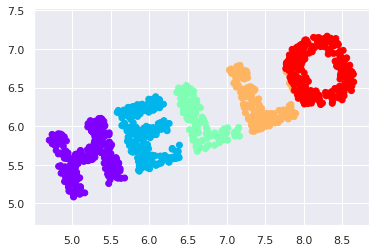

In [58]:
X2 = rotate(X, 20) + 5 #หมุน 20 องศา เลื่อนไปในแนวแกน x 5 หน่วย และแกน y 5 หน่วย
plt.scatter(X2[:, 0], X2[:, 1], **colorize)
plt.axis('equal');

### **MDS**

In [59]:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(X) #เรียกใช้ฟังก์ชันเพื่อดูระยะห่างระหว่างจุด
D.shape 

(1000, 1000)

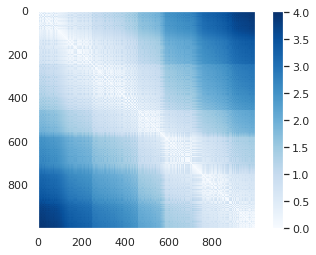

In [60]:
plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar(); #สีจะบ่งบอกถึงระยะห่างระหว่างจุด
#จุดที่ 1 กับจุดที่ 1000 ห่างกันประมาณ 4.0

In [61]:
D2 = pairwise_distances(X2)

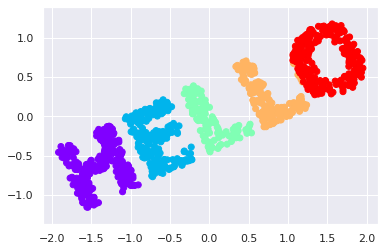

In [63]:
from sklearn.manifold import MDS
model = MDS(n_components=2, dissimilarity='precomputed', random_state=1)
out = model.fit_transform(D)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

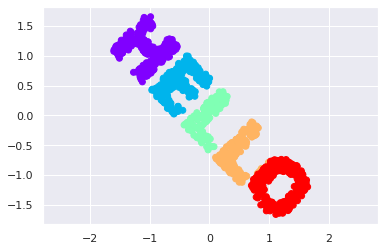

In [64]:
model = MDS(n_components=2, dissimilarity='precomputed')
out = model.fit_transform(D)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

In [65]:
def random_projection(X, dimension=3, rseed=42):
    assert dimension >= X.shape[1]
    rng = np.random.RandomState(rseed)
    C = rng.randn(dimension, dimension)
    e, V = np.linalg.eigh(np.dot(C, C.T))
    return np.dot(X, V[:X.shape[1]])
    
X3 = random_projection(X, 3)
X3.shape

(1000, 3)

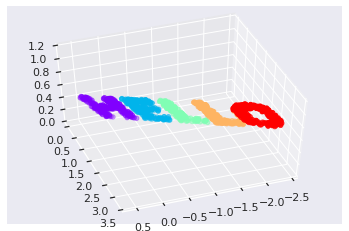

In [66]:
from mpl_toolkits import mplot3d # ข้อมูลสามมิติ
ax = plt.axes(projection='3d')
ax.scatter3D(X3[:, 0], X3[:, 1], X3[:, 2],
             **colorize)
ax.view_init(azim=70, elev=50)

### ทดลองทำ PCA กับ ข้อมูล X แล้ว plot graph
และดูผลการกระจายของข้อมูลว่ามันเปลี่ยนแปลงหรือไม่ อย่างไร

## **Quiz 4**

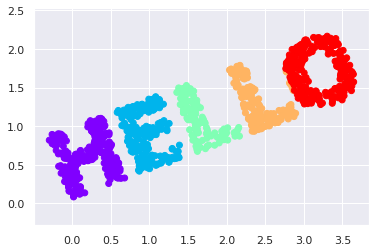

In [67]:
X2 = rotate(X, 20) 
plt.scatter(X2[:, 0], X2[:, 1], **colorize)
plt.axis('equal');

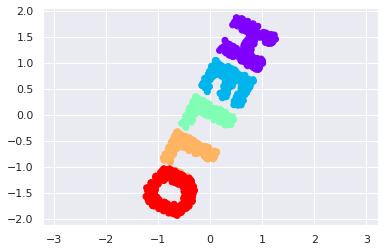

In [68]:
model = MDS(n_components=2, dissimilarity='precomputed')
out = model.fit_transform(D)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

**MDS ระยะห่างระหว่างจุดทุกคู่จะเหมือนเดิม**

In [69]:
from sklearn.decomposition import PCA

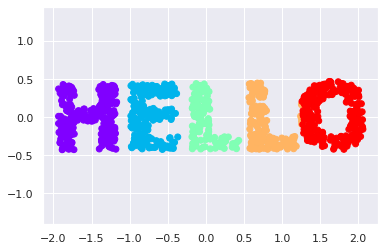

In [70]:
model = PCA (n_components=2)
out2 = model.fit_transform(X2)
plt.scatter(out2[:, 0], out2[:, 1], **colorize)
plt.axis('equal');

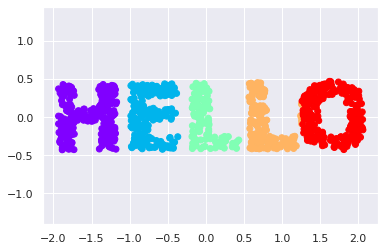

In [71]:
model = PCA (n_components=2)
out = model.fit_transform(out)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

**PCA กราฟจะมีลักษณะคล้ายเดิม เนื่องจากข้อมูลมี 2 dimention**



* zorder in plt.imshow

* np.allclose()